# 大規模データ解析入門 (2)　課題 - 解答例

---
## データ

[第07回の実習](02_large_data_analysis_ja.ipynb)で使ったサンプルデータと同じです。


### サンプルデータのソース

Abe, A., Kosugi, S., Yoshida, K., Natsume, S., Takagi, H., Kanzaki, H., Matsumura, H., Yoshida, K., Mitsuoka, C., Tamiru, M., Innan, H., Cano, L., Kamoun, S., Terauchi, R. (2012). [Genome sequencing reveals agronomically important loci in rice using MutMap.](https://www.nature.com/articles/nbt.2095) _Nature biotechnology_, 30(2), 174.

In [1]:
"""
＊重要＊
最初にこのセルを実行してください。
この課題で使うサンプルファイルをダウンロードして、pandasデータフレームを作成します。
"""
#--- データのダウンロード  ---
!wget -q https://raw.githubusercontent.com/CropEvol/lecture/master/data/mutmap_bulk.txt -O mutmap_bulk.txt

#--- pandasを読み込む  ---
import pandas as pd

#--- ファイルを読み込む ---
dataset = 'mutmap_bulk.txt' # 読み込みファイル名

# header=-1（列名行なし）を指定した場合、列名として通し番号が付けられます。
# names=[リスト]とすることで、通し番号の代わりに列名を指定することが可能です。
df = pd.read_csv(dataset, sep="\t", header=-1, names=['chr', 'pos', 'ref_nucl', 'alt_nucl', 'ref_N', 'alt_N'])

#--- 表示 ---
df

/Users/ohta_a/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ohta_a/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,chr,pos,ref_nucl,alt_nucl,ref_N,alt_N
0,chr10,51406,G,A,6,3
1,chr10,59101,A,T,6,3
2,chr10,59112,A,C,7,2
3,chr10,61001,A,T,11,3
4,chr10,161375,A,G,13,5
5,chr10,161561,A,C,6,5
6,chr10,161562,T,A,6,5
7,chr10,393574,A,G,8,2
8,chr10,465981,A,C,7,2
9,chr10,1076409,G,A,3,3


---
## Exercise 1.
__SNP-indexを求めて、新たな列として追加する。__

ヒント1: SNP-index = alt_N / (ref_N + alt_N)

ヒント2: 列データの取り出し方 => 実習内容 [2. 任意のデータにアクセスする](02_large_data_analysis_ja.ipynb#1.2)

ヒント3: 実習内容 [3. SNP-indexを計算する](02_large_data_analysis_ja.ipynb#1.3)

In [7]:
# SNP-indexを計算する & 新しい列として追加
df['snp_index'] = df['alt_N'] / (df['ref_N'] + df['alt_N'])

# 表示(最初の10データのみ)
df.head(10)

,chr,pos,ref_nucl,alt_nucl,ref_N,alt_N,snp_index
0,chr10,51406,G,A,6,3,0.333333
1,chr10,59101,A,T,6,3,0.333333
2,chr10,59112,A,C,7,2,0.222222
3,chr10,61001,A,T,11,3,0.214286
4,chr10,161375,A,G,13,5,0.277778
5,chr10,161561,A,C,6,5,0.454545
6,chr10,161562,T,A,6,5,0.454545
7,chr10,393574,A,G,8,2,0.200000
8,chr10,465981,A,C,7,2,0.222222
9,chr10,1076409,G,A,3,3,0.500000


---
## Exercise 2. 
__`pos`列 が 10~15 Mbのデータのみを抽出する（`pos`列の単位は bp）。__

ヒント1: 1Mb = 1000 kb = 1000000 bp 

ヒント2: 実習内容 [4. 条件に合うデータを抽出する](02_large_data_analysis_ja.ipynb#1.4)



In [10]:
# 条件を指定して抽出
sub = df[ (df['pos']>=10*1000*1000) & (df['pos']<15*1000*1000) ]

# 表示
sub

,chr,pos,ref_nucl,alt_nucl,ref_N,alt_N,snp_index
171,chr10,10722248,A,T,16,3,0.157895
172,chr10,10824473,T,C,8,10,0.555556
173,chr10,10824636,A,G,7,8,0.533333
174,chr10,10862892,C,T,6,6,0.500000
175,chr10,10862933,G,C,45,31,0.407895
176,chr10,10862950,T,C,50,29,0.367089
177,chr10,10865815,A,G,13,8,0.380952
178,chr10,10885372,A,G,0,7,1.000000
179,chr10,11148058,G,A,1,8,0.888889
180,chr10,11150121,G,C,2,4,0.666667


---
## Exercise 3. 
__SNP-index全データの散布図を描く。その際、x軸は`pos`列の値、y軸はSNP-indexの値にする。 また、10~15 Mbの位置にあるSNP-indexのデータのみを赤色で表示する。__

ヒント1: 実習内容 [6. SNP-indexのグラフを描く](02_large_data_analysis_ja.ipynb#1.6)

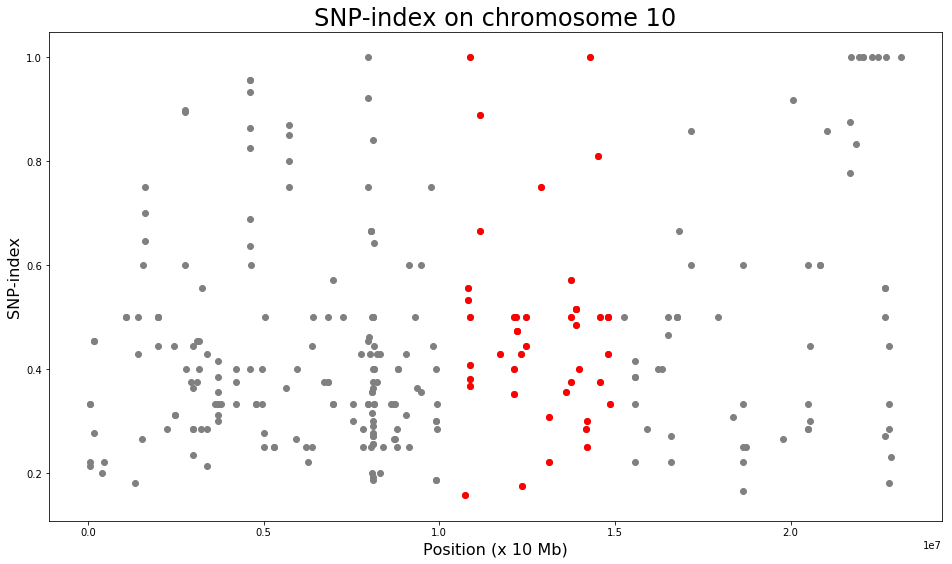

In [12]:
###### SNP-indexのグラフ作成 ######
"""
この1行はmatplotlibを使ったグラフを、Jupyter Notebook上で表示させるために必要です。
Pythonプログラムではありません。Jupyter Notebookの「マジックコマンド」と言われるものです。
"""
%matplotlib inline


"""
ここからPythonプログラム
"""
#--- ライブラリを読み込む ---
import matplotlib.pyplot as plt

#--- x軸データとy軸データ ---
x = df['pos']
y = df['snp_index']

#--- グラフ描画 ---
fig = plt.figure(figsize=[16,9])    # グラフフィールドの設定
plt.scatter(x, y, color='gray')      # 散布図
plt.title('SNP-index on chromosome 10', fontsize=24)  # グラフタイトル
plt.xlabel('Position (x 10 Mb)', fontsize=16)  # x軸ラベル
plt.ylabel('SNP-index', fontsize=16)           # y軸ラベル


#--- 10~15 Mbのデータを赤でプロット（重ね描き） ---
x1 = sub['pos']
y1 = sub['snp_index']
plt.scatter(x1, y1, color='red')


---

## [Challenge] Exercise 4.  <small>提出不要課題</small>
 
__塩基座位数についてのSliding Window解析のプログラムを作る。なお、塩基座位数は「平均値」ではなく「個数（データ数、行数）」__

実習テキストを参考に、ぜひ自分でプログラムを書いてみてください。  
プログラミングの練習になると思います。  

ヒント: 実習内容 [7. Sliding Window解析](02_large_data_analysis_ja.ipynb#1.7)

Text(0,0.5,'#Loci')

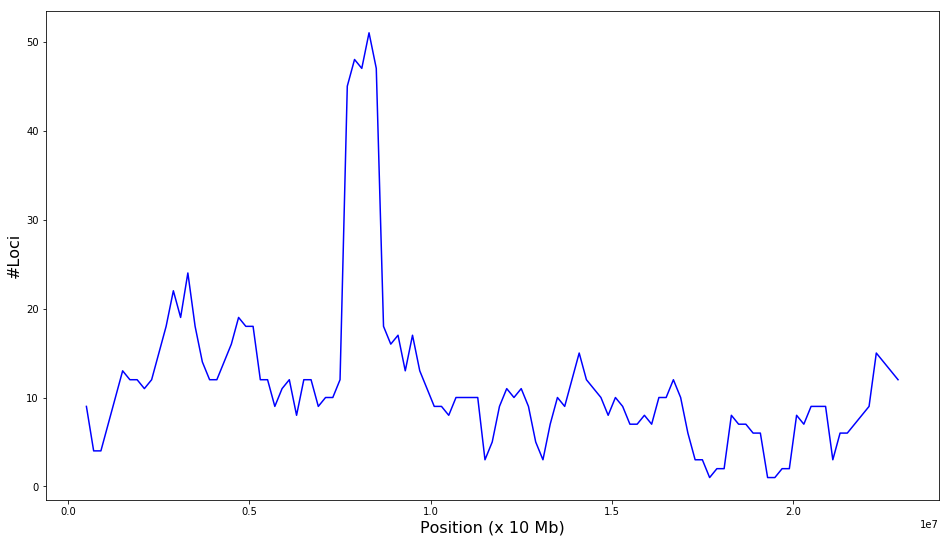

In [15]:
###### Sliding Window解析 ######
#---  NumPyライブラリの読み込み ---
import numpy as np

#--- 区間サイズとステップサイズ ---
CHROM_SIZE = 23207287       # Chromosome 10　の全長 (bp)
WIN_SIZE       = 1 * 1000 * 1000     #  1 Mb = 1000 kb = 1,000,000 bp
STEP_SIZE     = 0.2 * 1000* 1000     #  0.2 Mb = 200 kb = 200,000 bp

#--- 区間データ用のリストを準備 ---
win_position  = []  # 区間中央値用リスト
win_locus_num = []  # 平均SNP-index用リスト

#--- 全ての区間を調べる ---
"""
/// 調べる区間 ///
start, end
0, 0+1000 (kb)
200, 200+1000
400, 400+1000
  .
  .
  .

/// WIN_SIZEとSTEP_SIZEを使って表現すると... ///
繰り返し数:　n = 0, 1, 2, ...

start = STEP_SIZE * n  
end = start + WIN_SIZE


end > CHROM_SIZEになったとき、繰り返しを終える。

このように、繰り返し数を指定しない場合は、for文ではなく、while文を使用します。
"""

n = 0 # 繰り返し数
while True:
    
    #--- 区間のstartとend position ---
    start = STEP_SIZE * n 
    end   = start + WIN_SIZE
    
    #--- 区間の中央値をリストに追加する ---
    p = (start + end) / 2
    win_position.append(p)
    
    #--- 区間内データを抽出 ---
    sub = df[(df['pos'] >= start) & (df['pos'] < end)]
    
    #--- 区間内の塩基座数をカウント---
    i = len(sub)
    win_locus_num.append(i)
        
    #--- 繰り返し数を+1 ---
    n += 1
    
    #--- 全ての区間を調べた時、whileから出る ---
    if end > CHROM_SIZE:
        break

#--- グラフ作成  ---
fig = plt.figure(figsize=[16,9])
plt.plot(win_position, win_locus_num, color='blue')   
plt.xlabel('Position (x 10 Mb)', fontsize=16)  # x軸ラベル
plt.ylabel('#Loci', fontsize=16)        # y軸ラベル